In [94]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [95]:
data_train = pd.read_csv("/Users/mira/Projects/Kaggle/Tatanic/train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
data_train.mean()

/var/folders/lw/87zw5dbd6cx766k845t9ghyh0000gn/T/ipykernel_6282/2509368278.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

From the above information, we have:
1. There are 891 passengers with 12 features (Passenger id, Survived or not, Premium class, etc.)
2. Some information are missing, for example, we only have 714 Age data, and 204 Cabin data.
3. There are approximately 0.383838 passengers survived.
4. Most passenger lived in 2 or 3 class.
5. The average age of all passengers is 29.699118
...

To make the relationship between whether the passenger was survived and other attributes more clear, use the plots.

In [98]:
import matplotlib.pyplot as plt

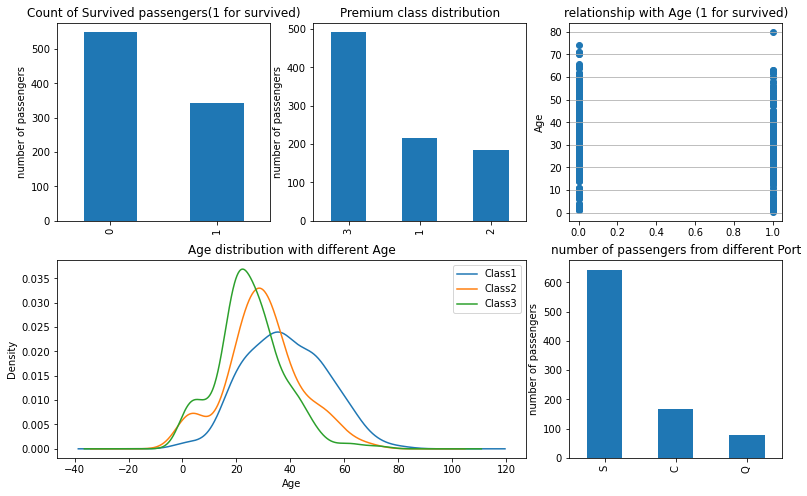

In [119]:
fig = plt.figure(figsize=(13,8))
fig.set(alpha = 1)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind = "bar")
plt.title(u"Count of Survived passengers(1 for survived)")
plt.ylabel(u"number of passengers")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind = "bar")
plt.title(u"Premium class distribution")
plt.ylabel(u"number of passengers")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"Age")
plt.grid(b=True, which="major", axis="y")
plt.title(u"relationship with Age (1 for survived)")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind = "kde")
data_train.Age[data_train.Pclass == 2].plot(kind = "kde")
data_train.Age[data_train.Pclass == 3].plot(kind = "kde")
plt.xlabel(u"Age")
plt.ylabel(u"Density")
plt.title(u"Age distribution with different Age")
plt.legend((u"Class1", u"Class2", u"Class3"), loc = "best")

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind = "bar")
plt.title(u"number of passengers from different Port")
plt.ylabel(u"number of passengers")
plt.show()

From above plots, we have:
1. Only less than 350 passenger survived. the number is less than the half.
2. Most passengers are in Class 3. 
3. from the last plot at (0,2), we cannot find the relationship between the Age and Survived.
4. Class 3 passengers are younger than Class 2 passengers, and Class 2 passengers are younger than Class 1 passengers.
5. Number of passengers embarked at S, C, Q are decending, and over 600 passengers embarked at S.

__Second Thoughts:__
1. whether that a passenger survived is related to Cabin and Pclass, which might related to the wealth level.
2. whether that a passenger survived is related to Age and Cabin
3. whether that a passenger survived is related to the port that one embarked.

<Figure size 432x288 with 0 Axes>

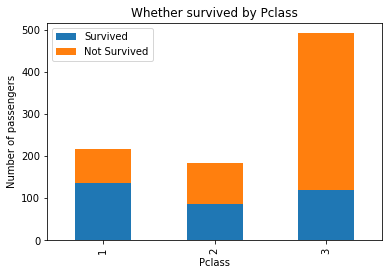

In [120]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Pclass")
plt.xlabel(u"Pclass") 
plt.ylabel(u"Number of passengers") 

plt.show()

<Figure size 432x288 with 0 Axes>

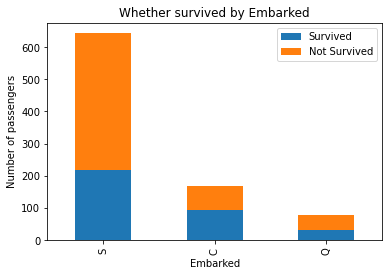

In [121]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Embarked")
plt.xlabel(u"Embarked") 
plt.ylabel(u"Number of passengers") 

plt.show()

<Figure size 432x288 with 0 Axes>

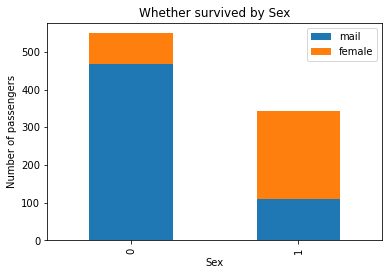

In [122]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'mail':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Sex")
plt.xlabel(u"Sex") 
plt.ylabel(u"Number of passengers")
plt.show()

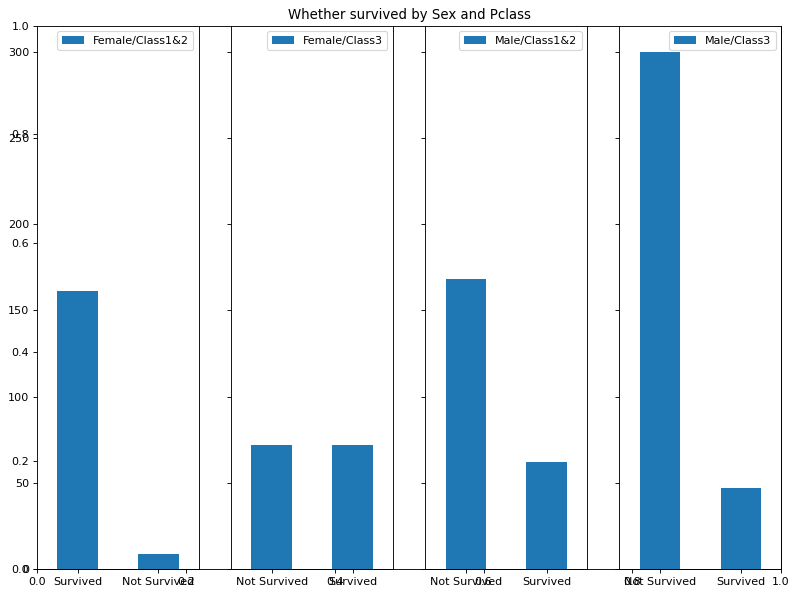

In [155]:
fig=plt.figure(figsize=(12,9), dpi=80)
fig.set(alpha=0.65)
plt.title(u"Whether survived by Sex and Pclass")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar')
ax1.set_xticklabels([u"Survived", u"Not Survived"], rotation=0)
ax1.legend([u"Female/Class1&2"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar')
ax2.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
ax2.legend([u"Female/Class3"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar')
ax3.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
ax3.legend([u"Male/Class1&2"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar')
ax4.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
ax4.legend([u"Male/Class3"], loc="best")

plt.show()